<h1>fashion_mnist</h1>

In [2]:
##load the data
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()### import the data

In [4]:
x_test = x_test.reshape(-1,x_test.shape[1]*x_test.shape[2])
x_train = x_train.reshape(-1,x_train.shape[1]*x_train.shape[2])
##reshape

Text(0, 0.5, 'Cumulative explained variance')

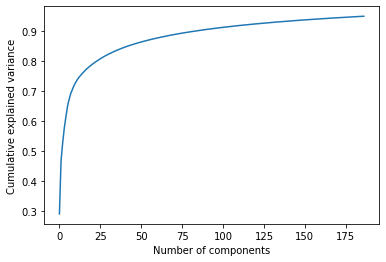

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
###use pca

In [8]:
###According to the graph the best pca is 55 after that its Increase slowly 
NCOMPONENTS = 55

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(x_train)
X_pca_train_invers=pca.inverse_transform(X_pca_train)
X_pca_test = pca.transform(x_test)
pca_std = np.std(X_pca_train)

print(x_train.shape)
print(X_pca_train.shape)
##from 50 

(60000, 784)
(60000, 55)


In [10]:
inv_pca_train = pca.inverse_transform(X_pca_train)
inv_pca_test = pca.inverse_transform(X_pca_test)
##transfrom to the data

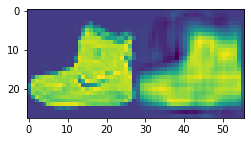

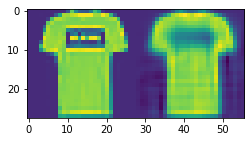

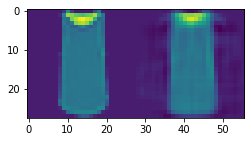

In [12]:
###befor the pca and after the pca
def side_by_side(indexes):
    org = x_train[indexes].reshape(28,28)
    rec = inv_pca_train[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,3):
    side_by_side(index)

<h5>Ensemble Learning</h5>

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score

In [ ]:
##RandomForestClassifier

In [16]:
rnd_clf = RandomForestClassifier()
clf=RandomForestClassifier()
clf.fit(inv_pca_train, y_train)
y_pred = clf.predict(inv_pca_test)
acc=accuracy_score(y_test, y_pred)

In [20]:
print(acc,"accuracy_score ")

0.8701 accuracy_score 


In [21]:
print(confusion_matrix(y_test,y_pred))

[[852   0  12  29   5   6  85   0  11   0]
 [  4 959   2  25   4   0   5   0   1   0]
 [ 13   0 793  12 112   0  63   0   7   0]
 [ 17   1  11 905  27   1  34   0   3   1]
 [  1   0  98  40 804   0  54   0   3   0]
 [  0   0   0   0   0 942   0  40   2  16]
 [154   1 114  30  88   0 593   0  20   0]
 [  0   0   0   0   0  24   0 940   0  36]
 [  3   0   3   4   5   3   6   4 971   1]
 [  0   0   0   0   0  17   0  40   1 942]]


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.87      0.91      0.89      1000
           4       0.77      0.80      0.79      1000
           5       0.95      0.94      0.95      1000
           6       0.71      0.59      0.64      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
##BaggingClassifier

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [35]:
bc = BaggingClassifier(
    random_state=666
)

In [12]:
bc.fit(x_train, y_train)
preds = bc.predict(x_test)

In [26]:
print('Bagging Classifier accuracy: ', accuracy_score(y_test, preds))
print('Bagging Classifier f1-score: ', f1_score(y_test, preds,average='macro'))

Bagging Classifier accuracy:  0.8529
Bagging Classifier f1-score:  0.8513314945698186


In [30]:
print(confusion_matrix(y_test,preds))

[[848   2  16  27   7   1  90   0   9   0]
 [  9 960   4  22   2   0   2   0   1   0]
 [ 11   1 772  13 121   0  74   0   8   0]
 [ 32   9  19 883  27   0  27   0   3   0]
 [  3   3 129  40 760   2  63   0   0   0]
 [  0   0   0   1   0 946   0  36   4  13]
 [176   3 129  31 101   2 542   0  16   0]
 [  0   0   0   0   0  32   0 932   2  34]
 [  3   3   9   4   2   7  17   7 948   0]
 [  0   0   1   0   0  13   0  45   3 938]]


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,preds))
   

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.77      0.74      1000
           3       0.86      0.88      0.87      1000
           4       0.75      0.76      0.75      1000
           5       0.94      0.95      0.94      1000
           6       0.67      0.54      0.60      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
##DecisionTreeClassifier

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
random_state=0)
scores = cross_val_score(clf, X_pca_train, y_train, cv=5)
scores.mean()

0.7686833333333333